In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
import warnings
warnings.filterwarnings('ignore')

In [2]:
data1 = pd.read_csv(r'C:\Users\ANKUSH\Desktop\AI ML\ML\Datasets\quikr_car.csv')

In [3]:
df = data1.copy()

In [4]:
df.head(10)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
5,Ford EcoSport Titanium 1.5L TDCi,Ford,2015,Ask For Price,"59,000 kms",Diesel
6,Ford Figo,Ford,2012,"1,75,000","41,000 kms",Diesel
7,Hyundai Eon,Hyundai,2013,"1,90,000","25,000 kms",Petrol
8,Ford EcoSport Ambiente 1.5L TDCi,Ford,2016,"8,30,000","24,530 kms",Diesel
9,Maruti Suzuki Alto K10 VXi AMT,Maruti,2015,"2,50,000","60,000 kms",Petrol


In [5]:
df.shape

(892, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [7]:
df.describe()

,name,company,year,Price,kms_driven,fuel_type
count,892,892,892,892,840,837
unique,525,48,61,274,258,3
top,Honda City,Maruti,2015,Ask For Price,"45,000 kms",Petrol
freq,13,235,117,35,30,440


In [8]:
df['fuel_type'] = df['fuel_type'].fillna(df['fuel_type'].mode()[0])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   892 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [10]:
df['kms_driven'] = df['kms_driven'].str.replace('kms','')

In [11]:
df.sample(5)

,name,company,year,Price,kms_driven,fuel_type
543,Maruti Suzuki Baleno Sigma 1.2,Maruti,2016,"4,25,000","40,000",Petrol
147,Renault Duster,Renault,2014,"4,49,999","50,000",Diesel
752,Maruti Suzuki Ertiga VDi,Maruti,2012,"5,00,000","48,000",Diesel
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000",Petrol
261,Maruti Suzuki Eeco 5 STR WITH AC HTR,Maruti,2015,"2,51,111","55,000",Petrol


In [12]:
df['kms_driven'].describe()

count         840
unique        258
top       45,000 
freq           30
Name: kms_driven, dtype: object

In [13]:
df['kms_driven'].unique()

array(['45,000 ', '40 ', '22,000 ', '28,000 ', '36,000 ', '59,000 ',
       '41,000 ', '25,000 ', '24,530 ', '60,000 ', '30,000 ', '32,000 ',
       '48,660 ', '4,000 ', '16,934 ', '43,000 ', '35,550 ', '39,522 ',
       '39,000 ', '55,000 ', '72,000 ', '15,975 ', '70,000 ', '23,452 ',
       '35,522 ', '48,508 ', '15,487 ', '82,000 ', '20,000 ', '68,000 ',
       '38,000 ', '27,000 ', '33,000 ', '46,000 ', '16,000 ', '47,000 ',
       '35,000 ', '30,874 ', '15,000 ', '29,685 ', '1,30,000 ', '19,000 ',
       nan, '54,000 ', '13,000 ', '38,200 ', '50,000 ', '13,500 ',
       '3,600 ', '45,863 ', '60,500 ', '12,500 ', '18,000 ', '13,349 ',
       '29,000 ', '44,000 ', '42,000 ', '14,000 ', '49,000 ', '36,200 ',
       '51,000 ', '1,04,000 ', '33,333 ', '33,600 ', '5,600 ', '7,500 ',
       '26,000 ', '24,330 ', '65,480 ', '28,028 ', '2,00,000 ', '99,000 ',
       '2,800 ', '21,000 ', '11,000 ', '66,000 ', '3,000 ', '7,000 ',
       '38,500 ', '37,200 ', '43,200 ', '24,800 ', '45,872 ', 

In [14]:
df = df[df['kms_driven']!= 'Petrol']

In [15]:
df['kms_driven'] = df['kms_driven'].str.replace(',','')

In [16]:
df.sample(3)

,name,company,year,Price,kms_driven,fuel_type
274,Maruti Suzuki Dzire ZXI,Maruti,2013,"3,80,000",30000,Petrol
798,7 SEATER MAHINDRA BOLERO IN VERY GOOD,7,D...,Ask For Price,NaN,Petrol
487,Maruti Suzuki Ertiga Vxi,Maruti,2015,"5,50,000",75000,Petrol


In [17]:
df['kms_driven'] = df['kms_driven'].fillna(df['kms_driven'].median())

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 890 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        890 non-null    object
 1   company     890 non-null    object
 2   year        890 non-null    object
 3   Price       890 non-null    object
 4   kms_driven  890 non-null    object
 5   fuel_type   890 non-null    object
dtypes: object(6)
memory usage: 48.7+ KB


In [19]:
df['kms_driven'] = df['kms_driven'].astype('int')

In [20]:
df['Price'] = df['Price'].str.replace(',','')

In [21]:
df['Price'].unique()

array(['80000', '425000', 'Ask For Price', '325000', '575000', '175000',
       '190000', '830000', '250000', '182000', '315000', '415000',
       '320000', '1000000', '500000', '350000', '160000', '310000',
       '75000', '100000', '290000', '95000', '180000', '385000', '105000',
       '650000', '689999', '448000', '549000', '501000', '489999',
       '280000', '349999', '284999', '345000', '499999', '235000',
       '249999', '1475000', '395000', '220000', '170000', '85000',
       '200000', '570000', '110000', '448999', '1891111', '159500',
       '344999', '449999', '865000', '699000', '375000', '224999',
       '1200000', '195000', '351000', '240000', '90000', '155000',
       '600000', '189500', '210000', '390000', '135000', '1600000',
       '701000', '265000', '525000', '372000', '635000', '550000',
       '485000', '329500', '251111', '569999', '69999', '299999',
       '399999', '450000', '270000', '158400', '179000', '125000',
       '299000', '150000', '275000', '285000',

In [22]:
df = df[df['Price']!= 'Ask For Price']

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 855 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        855 non-null    object
 1   company     855 non-null    object
 2   year        855 non-null    object
 3   Price       855 non-null    object
 4   kms_driven  855 non-null    int32 
 5   fuel_type   855 non-null    object
dtypes: int32(1), object(5)
memory usage: 43.4+ KB


In [24]:
df['Price'] = df['Price'].astype('int')

In [25]:
df['year'].unique()

array(['2007', '2006', '2014', '2012', '2013', '2016', '2015', '2010',
       '2017', '2008', '2018', '2011', '2019', '2009', '2005', '2000',
       '150k', 'TOUR', '2003', 'r 15', '2004', 'sale', '1995', 'ara)',
       '2002', 'SELL', '2001', 'tion', 'odel', '2 bs', 'arry', 'o...',
       'Zest', 'ture', 'emi', 'car', 'able', 'd...', 'SALE', 'sell',
       'd Ex', 'n...', 'e...', 'go .', 'k...', 'o c4', 'zire', 'Sumo',
       'cab', 'EV2', 'r...', 'zest'], dtype=object)

In [26]:
df.drop('year',axis=1,inplace = True)

In [27]:
df.sample(3)

,name,company,Price,kms_driven,fuel_type
111,Honda Amaze 1.2 S i VTEC,Honda,325000,42000,Petrol
420,Renault Duster 85 PS RxL Explore LE,Renault,715000,65000,Diesel
557,Tata Nano,Tata,60000,6800,Petrol


In [28]:
df['company'].unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat',
       'MARUTI', 'Force', 'Mercedes', 'Land', 'Yamaha', 'URJENT', 'Swift',
       'Used', 'Jaguar', 'Jeep', 'Commercial', 'tata', 'Sale', 'very',
       'Volvo', 'I', 'i', '2012', 'Well', 'all', 'scratch', 'urgent',
       'sell', 'TATA', 'Any', 'Tara'], dtype=object)

In [29]:
df['company'].value_counts()

company
Maruti        227
Hyundai       139
Mahindra       99
Tata           70
Honda          60
Toyota         37
Chevrolet      34
Renault        33
Ford           30
Volkswagen     19
Skoda          13
Audi           11
Mini            8
BMW             8
Datsun          7
Nissan          6
Mitsubishi      6
Mercedes        6
Fiat            4
Force           4
Commercial      3
Hindustan       3
MARUTI          2
Used            2
Jaguar          2
urgent          2
tata            2
Any             1
TATA            1
sell            1
i               1
scratch         1
all             1
Well            1
2012            1
Land            1
I               1
Volvo           1
very            1
Sale            1
Jeep            1
Swift           1
URJENT          1
Yamaha          1
Tara            1
Name: count, dtype: int64

In [30]:
df['name'].value_counts()

name
Honda City                                 13
Honda Amaze                                11
Maruti Suzuki Dzire                        10
Mahindra Scorpio S10                        9
Maruti Suzuki Swift Dzire VXi 1.2 BS IV     7
                                           ..
Swift Dzire Tour 27 Dec 2016 Regis          1
Mahindra Scorpio W Turbo 2.6DX 9 Seater     1
Honda Jazz S MT                             1
Hyundai Sonata Transform 2.4 GDi MT         1
Tata Zest XM Diesel                         1
Name: count, Length: 501, dtype: int64

In [31]:
df['fuel_type'].value_counts()

fuel_type
Petrol    467
Diesel    386
LPG         2
Name: count, dtype: int64

In [32]:
fuel = pd.get_dummies(df['fuel_type'],drop_first=True,dtype=int)
fuel

,LPG,Petrol
0,0,1
1,0,0
3,0,1
4,0,0
6,0,0
...,...,...
885,0,0
886,0,1
887,0,1
888,0,0


In [33]:
df = pd.concat([df,fuel],axis=1)
df.head()

,name,company,Price,kms_driven,fuel_type,LPG,Petrol
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,80000,45000,Petrol,0,1
1,Mahindra Jeep CL550 MDI,Mahindra,425000,40,Diesel,0,0
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,325000,28000,Petrol,0,1
4,Ford EcoSport Titanium 1.5L TDCi,Ford,575000,36000,Diesel,0,0
6,Ford Figo,Ford,175000,41000,Diesel,0,0


In [34]:
df.drop('fuel_type',axis=1,inplace=True)

In [35]:
df.sample(3)

,name,company,Price,kms_driven,LPG,Petrol
698,Mercedes Benz C Class C 220 CDI Avantgarde,Mercedes,1225000,76000,0,0
377,Hyundai i10 Magna 1.2,Hyundai,175000,45000,0,1
30,Maruti Suzuki Swift Dzire ZDi,Maruti,385000,35522,0,0


In [36]:
df.tail(3)

,name,company,Price,kms_driven,LPG,Petrol
887,Ta,Tara,310000,41000,0,1
888,Tata Zest XM Diesel,Tata,260000,27000,0,0
889,Mahindra Quanto C8,Mahindra,390000,40000,0,0


In [37]:
df['company_name'] = df['name'].str.split(' ').str[0]

In [38]:
df.sample(3)

,name,company,Price,kms_driven,LPG,Petrol,company_name
546,Hyundai Getz Prime 1.3 GVS,Hyundai,110000,20000,0,1,Hyundai
729,Mahindra Xylo D2 BS IV,Mahindra,390000,48000,0,0,Mahindra
44,Honda Amaze,Honda,284999,46000,0,0,Honda


In [39]:
df['name']!= df['name'].str.split(' ').str[0]


0       True
1       True
3       True
4       True
6       True
       ...  
885     True
886     True
887    False
888     True
889     True
Name: name, Length: 855, dtype: bool

In [40]:
df.head()

,name,company,Price,kms_driven,LPG,Petrol,company_name
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,80000,45000,0,1,Hyundai
1,Mahindra Jeep CL550 MDI,Mahindra,425000,40,0,0,Mahindra
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,325000,28000,0,1,Hyundai
4,Ford EcoSport Titanium 1.5L TDCi,Ford,575000,36000,0,0,Ford
6,Ford Figo,Ford,175000,41000,0,0,Ford


In [41]:
df.drop('company_name',axis=1,inplace=True)

In [42]:
df.sample()

,name,company,Price,kms_driven,LPG,Petrol
62,Tata Indigo eCS LS CR4 BS IV,Tata,200000,130000,0,0


In [43]:
df[df['company']=='2012']

,name,company,Price,kms_driven,LPG,Petrol
792,2012 Tata Sumo Gold f,2012,250000,41000,0,1


In [44]:
df = df[df['company']!= '2012']

In [45]:
df[df['company']=='2012']

,name,company,Price,kms_driven,LPG,Petrol


In [46]:
df.sample(4)

,name,company,Price,kms_driven,LPG,Petrol
387,Toyota Innova 2.5 E MS 7 STR BS IV,Toyota,770000,0,0,0
152,Renault Duster,Renault,399999,41000,0,0
502,Honda Brio VX AT,Honda,450000,11000,0,1
791,Chevrolet Beat LS Diesel,Chevrolet,189000,31000,0,0


In [47]:
def remove_company(row):
    name= row['name']
    company = row['company']
    if name.startswith(company):
        return name[len(company):].strip()
    else:
        return name

In [48]:
df['rename'] = df.apply(remove_company,axis=1)

In [49]:
df.drop('name',axis=1,inplace=True)

In [50]:
df.head()

,company,Price,kms_driven,LPG,Petrol,rename
0,Hyundai,80000,45000,0,1,Santro Xing XO eRLX Euro III
1,Mahindra,425000,40,0,0,Jeep CL550 MDI
3,Hyundai,325000,28000,0,1,Grand i10 Magna 1.2 Kappa VTVT
4,Ford,575000,36000,0,0,EcoSport Titanium 1.5L TDCi
6,Ford,175000,41000,0,0,Figo


In [51]:
df.head()

,company,Price,kms_driven,LPG,Petrol,rename
0,Hyundai,80000,45000,0,1,Santro Xing XO eRLX Euro III
1,Mahindra,425000,40,0,0,Jeep CL550 MDI
3,Hyundai,325000,28000,0,1,Grand i10 Magna 1.2 Kappa VTVT
4,Ford,575000,36000,0,0,EcoSport Titanium 1.5L TDCi
6,Ford,175000,41000,0,0,Figo


In [52]:
df['rename'] = df['rename'].str.split(' ').str[0:2].str.join(' ')

In [53]:
df['rename'].value_counts().head()

rename
Suzuki Swift     54
Suzuki Alto      43
Suzuki Wagon     28
Suzuki Ertiga    16
Santro Xing      15
Name: count, dtype: int64

In [54]:
df.describe()

,Price,kms_driven,LPG,Petrol
count,8.540000e+02,854.000000,854.000000,854.000000
mean,4.054193e+05,46023.224824,0.002342,0.545667
std,4.661851e+05,33549.006135,0.048365,0.498202
min,3.000000e+04,0.000000,0.000000,0.000000
25%,1.750000e+05,28000.000000,0.000000,0.000000
50%,2.999990e+05,41000.000000,0.000000,1.000000
75%,4.872500e+05,56000.000000,0.000000,1.000000
max,8.500003e+06,400000.000000,1.000000,1.000000


In [55]:
df[df['Price'] > 4000000]

,company,Price,kms_driven,LPG,Petrol,rename
562,Mahindra,8500003,45000,0,0,XUV500 W6


In [56]:
df = df[~df['Price'].isin([8500003])]

In [57]:
df[df['Price'] > 4000000]

,company,Price,kms_driven,LPG,Petrol,rename


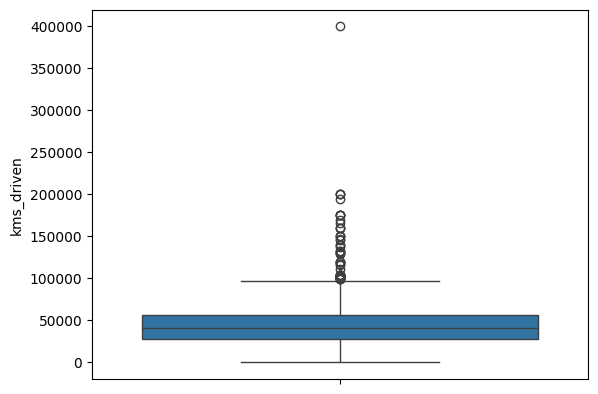

In [58]:
sns.boxplot(df['kms_driven'])
plt.show()

In [59]:
df['kms_driven'] = df['kms_driven'][df['kms_driven'] < df['kms_driven'].quantile(0.99999)]

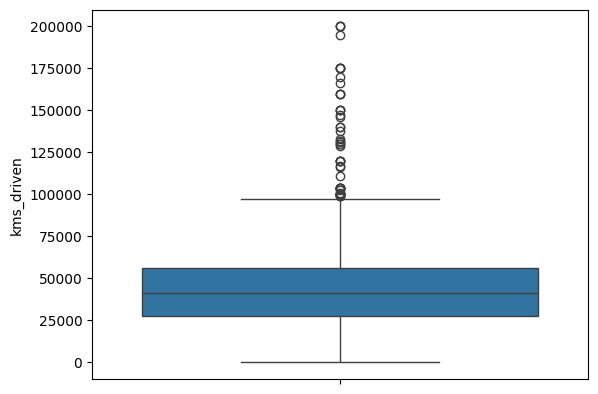

In [60]:
sns.boxplot(df['kms_driven'])
plt.show()

In [61]:
from scipy.stats import boxcox

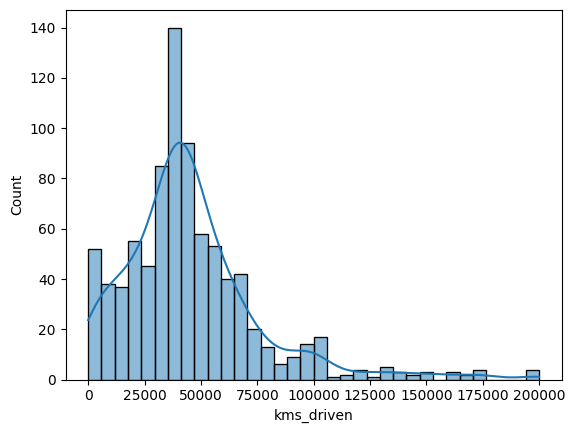

In [62]:
sns.histplot(df['kms_driven'],kde=True)
plt.show()

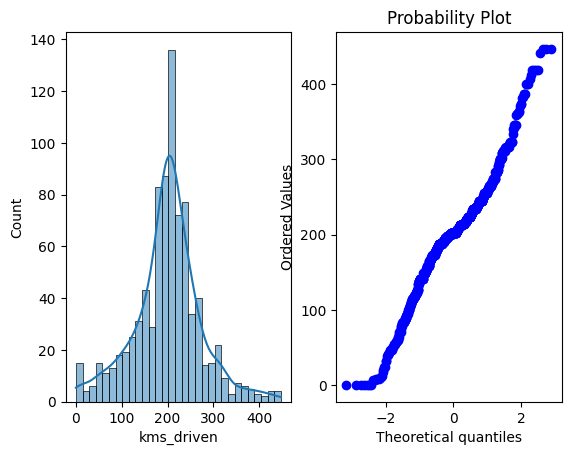

In [63]:
plt.subplot(1,2,1)
sns.histplot(np.sqrt(df['kms_driven']),kde=True)

plt.subplot(1,2,2)
stat.probplot(np.sqrt(df['kms_driven']), dist='norm', plot=plt)
plt.show()

In [64]:
df['new_kms'] = np.sqrt(df['kms_driven'])

In [65]:
df.drop('kms_driven' , axis=1, inplace=True)

In [66]:
df.head()

,company,Price,LPG,Petrol,rename,new_kms
0,Hyundai,80000,0,1,Santro Xing,212.132034
1,Mahindra,425000,0,0,Jeep CL550,6.324555
3,Hyundai,325000,0,1,Grand i10,167.332005
4,Ford,575000,0,0,EcoSport Titanium,189.736660
6,Ford,175000,0,0,Figo,202.484567


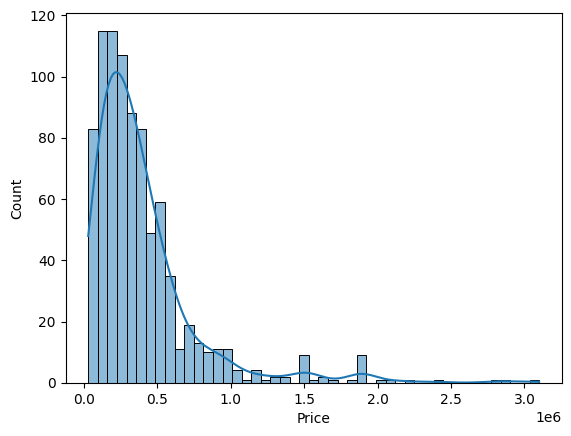

In [67]:
sns.histplot(df['Price'],kde=True)
plt.show()

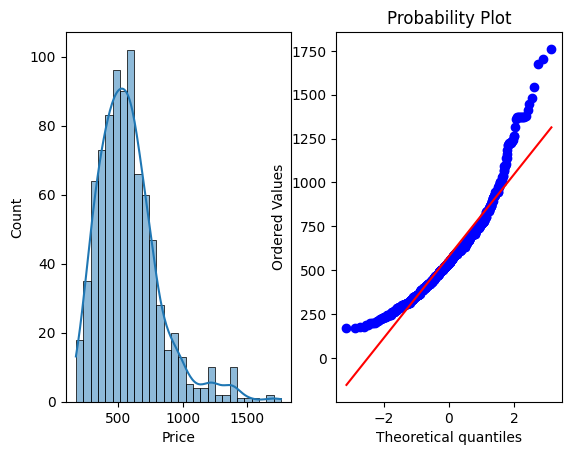

In [68]:
plt.subplot(1,2,1)
sns.histplot(np.sqrt(df['Price']),kde=True)

plt.subplot(1,2,2)
stat.probplot(np.sqrt(df['Price']), plot=plt, dist='norm')
plt.show()

In [69]:
ptr , plam = boxcox(df['Price'])

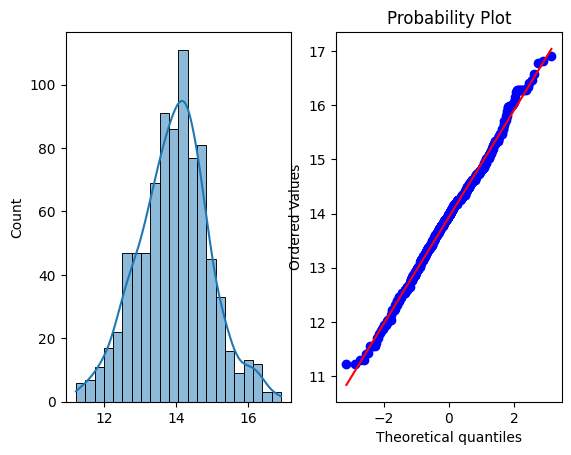

In [70]:
plt.subplot(1,2,1)
sns.histplot(ptr,kde=True)

plt.subplot(1,2,2)
stat.probplot(ptr, plot=plt, dist='norm')
plt.show()

In [71]:
df['new_price'] = ptr

In [72]:
df.drop('Price' , axis=1, inplace = True)

In [73]:
df.head()

,company,LPG,Petrol,rename,new_kms,new_price
0,Hyundai,0,1,Santro Xing,212.132034,12.383245
1,Mahindra,0,0,Jeep CL550,6.324555,14.414170
3,Hyundai,0,1,Grand i10,167.332005,14.084241
4,Ford,0,0,EcoSport Titanium,189.736660,14.787651
6,Ford,0,0,Figo,202.484567,13.328330


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 853 entries, 0 to 889
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   company    853 non-null    object 
 1   LPG        853 non-null    int32  
 2   Petrol     853 non-null    int32  
 3   rename     853 non-null    object 
 4   new_kms    852 non-null    float64
 5   new_price  853 non-null    float64
dtypes: float64(2), int32(2), object(2)
memory usage: 40.0+ KB


In [75]:
df['new_kms'] = df['new_kms'].fillna(df['new_kms'].mean())

In [76]:
x = df.drop('new_price', axis=1)
y = df['new_price']

In [77]:
x.head()

,company,LPG,Petrol,rename,new_kms
0,Hyundai,0,1,Santro Xing,212.132034
1,Mahindra,0,0,Jeep CL550,6.324555
3,Hyundai,0,1,Grand i10,167.332005
4,Ford,0,0,EcoSport Titanium,189.736660
6,Ford,0,0,Figo,202.484567


In [78]:
y

0      12.383245
1      14.414170
3      14.084241
4      14.787651
6      13.328330
         ...    
885    12.766299
886    13.986075
887    14.026274
888    13.810889
889    14.308317
Name: new_price, Length: 853, dtype: float64

In [79]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [81]:
ohe = OneHotEncoder()
ohe.fit(x[['rename','company']])

OneHotEncoder()

In [82]:
ohe.categories_

[array(['3 Series', '5 Series', '7 Series', 'A3 Cabriolet', 'A4 1.8',
        'A4 2.0', 'A6 2.0', 'A8', 'Accent', 'Accent Executive',
        'Accent GLE', 'Accent GLX', 'Accord', 'Amaze', 'Amaze 1.2',
        'Amaze 1.5', 'Aria Pleasure', 'Beat', 'Beat Diesel', 'Beat LS',
        'Beat LT', 'Beat PS', 'Benz A', 'Benz B', 'Benz C', 'Benz GLA',
        'Bolero DI', 'Bolero Power', 'Bolero SLE', 'Bolt XM', 'Brio',
        'Brio V', 'Brio VX', 'Car Ta', 'Chevrolet Sail', 'Chevrolet beat',
        'City', 'City 1.5', 'City SV', 'City VX', 'City ZX',
        'Commercial Maruti', 'Cooper S', 'Corolla', 'Corolla Altis',
        'Corolla H2', 'Creta', 'Creta 1.6', 'Cruze LTZ', 'Duster',
        'Duster 110', 'Duster 110PS', 'Duster 85', 'Duster 85PS',
        'Duster RxL', 'Dzire Tour', 'EcoSport', 'EcoSport Ambiente',
        'EcoSport Titanium', 'EcoSport Trend', 'Elantra 1.8', 'Elantra SX',
        'Elite i20', 'Endeavor 4x4', 'Enjoy', 'Enjoy 1.4', 'Eon', 'Eon D',
        'Eon Era', 'Eon Ma

In [83]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [84]:
column_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_),['rename','company']),
                                       ((StandardScaler(),['new_kms','LPG','Petrol'])),
                                      remainder='passthrough')

In [85]:
lr = LinearRegression()

In [86]:
pipe = make_pipeline(column_trans,lr)

In [87]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['3 Series', '5 Series', '7 Series', 'A3 Cabriolet', 'A4 1.8',
       'A4 2.0', 'A6 2.0', 'A8', 'Accent', 'Accent Executive',
       'Accent GLE', 'Accent GLX', 'Accord', 'Amaze', 'Amaze 1.2',
       'Amaze 1.5', 'Aria Pleasure', 'Beat', 'Beat Diesel', 'Beat LS',...
       'Jeep', 'Land', 'MARUTI', 'Mahindra', 'Maruti', 'Mercedes', 'Mini',
       'Mitsubishi', 'Nissan', 'Renault', 'Sale', 'Skoda', 'Swift',
       'TATA', 'Tara', 'Tata', 'Toyota', 'URJENT', 'Used', 'Volkswagen',
       'Volvo', 'Well', 'Yamaha', 'all', 'i', 'scratch', 'sell', 'tata',
       'urgent', 'very'], dtype=object)]),
                                                  ['rename', 'company']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['new_kms', 'LPG',
                                                   'Petrol'])])),
                ('linearregression', LinearRegression())])

In [88]:
y_pred= pipe.predict(x_test)

In [89]:
r2_score(y_test,y_pred)

0.6567228797053846

In [90]:
for i in range(20):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
    lr = LinearRegression()
    pipe = make_pipeline(column_trans,lr)
    pipe.fit(x_train,y_train)
    y_pred= pipe.predict(x_test)
    print(r2_score(y_test,y_pred))


0.637374058856663
0.6363415110002568
0.6605787438984367
0.5744499274715533
0.6279582102748814
0.5878365102402212
0.5954226460459213
0.6631465243025872
0.6898827916100061
0.7022355982434381
0.6470367115601234
0.7108278700028388
0.6473019284728445
0.6957537681676915
0.6302233842607592
0.5732440145174365
0.6321582116477016
0.7160016169127117
0.6286758322013941
0.7222617041422879


In [91]:
scores = []
for i in range(1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=i)
    lr = LinearRegression()
    pipe = make_pipeline(column_trans,lr)
    pipe.fit(x_train,y_train)
    y_pred= pipe.predict(x_test)
    scores.append(r2_score(y_test,y_pred))

In [92]:
np.argmax(scores)

49

In [93]:
scores[np.argmax(scores)]

0.7803009020513816

In [94]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=np.argmax(scores))
lr = LinearRegression()
pipe = make_pipeline(column_trans,lr)
pipe.fit(x_train,y_train)
y_pred= pipe.predict(x_test)
r2_score(y_test,y_pred)

0.7803009020513816

In [95]:
from sklearn.svm import SVR

In [96]:
svc = SVR()

In [97]:
pipe2 = make_pipeline(column_trans,svc)

In [98]:
pipe2.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['3 Series', '5 Series', '7 Series', 'A3 Cabriolet', 'A4 1.8',
       'A4 2.0', 'A6 2.0', 'A8', 'Accent', 'Accent Executive',
       'Accent GLE', 'Accent GLX', 'Accord', 'Amaze', 'Amaze 1.2',
       'Amaze 1.5', 'Aria Pleasure', 'Beat', 'Beat Diesel', 'Beat LS',...
       'Jeep', 'Land', 'MARUTI', 'Mahindra', 'Maruti', 'Mercedes', 'Mini',
       'Mitsubishi', 'Nissan', 'Renault', 'Sale', 'Skoda', 'Swift',
       'TATA', 'Tara', 'Tata', 'Toyota', 'URJENT', 'Used', 'Volkswagen',
       'Volvo', 'Well', 'Yamaha', 'all', 'i', 'scratch', 'sell', 'tata',
       'urgent', 'very'], dtype=object)]),
                                                  ['rename', 'company']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['new_kms', 'LPG',
                                                   'Petrol'])])),
                ('svr', SVR())])

In [99]:
y_pred2 = pipe2.predict(x_test)

In [100]:
r2_score(y_test,y_pred2)

0.700987254521142

In [101]:
score = []
for i in range(1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=i)
    svc = SVR()
    pipe2 = make_pipeline(column_trans,svc)
    pipe2.fit(x_train,y_train)
    y_pred2= pipe2.predict(x_test)
    score.append(r2_score(y_test,y_pred2))

In [102]:
np.argmax(score)

840

In [103]:
score[np.argmax(score)]

0.7460361784669514

In [105]:
from sklearn.ensemble import RandomForestRegressor

In [106]:
rfr= RandomForestRegressor()

In [107]:
pipe3 = make_pipeline(column_trans,rfr)

In [108]:
pipe3.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['3 Series', '5 Series', '7 Series', 'A3 Cabriolet', 'A4 1.8',
       'A4 2.0', 'A6 2.0', 'A8', 'Accent', 'Accent Executive',
       'Accent GLE', 'Accent GLX', 'Accord', 'Amaze', 'Amaze 1.2',
       'Amaze 1.5', 'Aria Pleasure', 'Beat', 'Beat Diesel', 'Beat LS',...
       'Jeep', 'Land', 'MARUTI', 'Mahindra', 'Maruti', 'Mercedes', 'Mini',
       'Mitsubishi', 'Nissan', 'Renault', 'Sale', 'Skoda', 'Swift',
       'TATA', 'Tara', 'Tata', 'Toyota', 'URJENT', 'Used', 'Volkswagen',
       'Volvo', 'Well', 'Yamaha', 'all', 'i', 'scratch', 'sell', 'tata',
       'urgent', 'very'], dtype=object)]),
                                                  ['rename', 'company']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['new_kms', 'LPG',
                                                   'Petrol'])])),
                ('randomforestregressor', RandomForestRegressor())])

In [109]:
y_pred3 = pipe3.predict(x_test)

In [110]:
r2_score(y_test,y_pred3)

0.5317828661747305